Question 2

C:\Users\brett\AppData\Local\Temp\ipykernel_13984\2211342217.py:183: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(StringIO(data.strip()), sep=r'\t+')


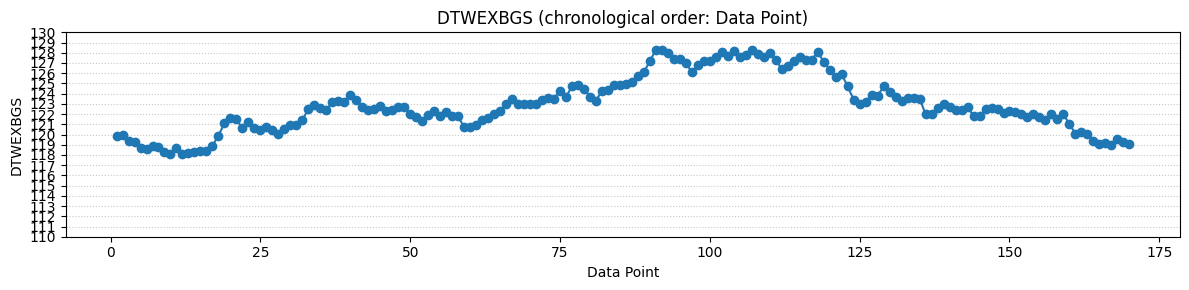

Data point count: 170
Max value: 128.3 on 2022-09-26
Min value: 118.1 on 2022-05-31

Estimated slopes (value change per data point):
  Pre-Oct 2022 slope = 0.0771 (R^2=0.772)
  Post-Oct 2022 slope = -0.1259 (R^2=0.855)
  Overall slope = 0.0175 (R^2=0.099)

Answers (recommended):
  Part 1 (graph): C
  Part 2 (trend): B
  Part 3 (seasonality): does not appear


In [1]:
# ts_analysis_dtwexbgs.py
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = """
Month\tDay\tYear\tDTWEXBGS
5\t17\t2022\t119.9
5\t18\t2022\t120.0
5\t19\t2022\t119.4
5\t20\t2022\t119.3
5\t23\t2022\t118.7
5\t24\t2022\t118.6
5\t25\t2022\t118.9
5\t26\t2022\t118.8
5\t27\t2022\t118.3
5\t31\t2022\t118.1
6\t1\t2022\t118.7
6\t2\t2022\t118.1
6\t3\t2022\t118.2
6\t6\t2022\t118.3
6\t7\t2022\t118.4
6\t8\t2022\t118.4
6\t9\t2022\t118.9
6\t10\t2022\t119.9
6\t13\t2022\t121.1
6\t14\t2022\t121.6
6\t15\t2022\t121.5
6\t16\t2022\t120.6
6\t17\t2022\t121.2
6\t21\t2022\t120.6
6\t22\t2022\t120.4
6\t23\t2022\t120.7
6\t24\t2022\t120.4
6\t27\t2022\t120.1
6\t28\t2022\t120.5
6\t29\t2022\t120.9
6\t30\t2022\t120.9
7\t1\t2022\t121.4
7\t5\t2022\t122.5
7\t6\t2022\t122.9
7\t7\t2022\t122.6
7\t8\t2022\t122.4
7\t11\t2022\t123.2
7\t12\t2022\t123.3
7\t13\t2022\t123.2
7\t14\t2022\t123.9
7\t15\t2022\t123.4
7\t18\t2022\t122.7
7\t19\t2022\t122.4
7\t20\t2022\t122.5
7\t21\t2022\t122.8
7\t22\t2022\t122.3
7\t25\t2022\t122.4
7\t26\t2022\t122.7
7\t27\t2022\t122.7
7\t28\t2022\t122.0
7\t29\t2022\t121.7
8\t1\t2022\t121.3
8\t2\t2022\t121.9
8\t3\t2022\t122.3
8\t4\t2022\t121.8
8\t5\t2022\t122.2
8\t8\t2022\t121.8
8\t9\t2022\t121.8
8\t10\t2022\t120.7
8\t11\t2022\t120.7
8\t12\t2022\t120.9
8\t15\t2022\t121.4
8\t16\t2022\t121.6
8\t17\t2022\t122.0
8\t18\t2022\t122.3
8\t19\t2022\t123.0
8\t22\t2022\t123.5
8\t23\t2022\t123.0
8\t24\t2022\t123.0
8\t25\t2022\t123.0
8\t26\t2022\t123.0
8\t29\t2022\t123.4
8\t30\t2022\t123.6
8\t31\t2022\t123.5
9\t1\t2022\t124.3
9\t2\t2022\t123.7
9\t6\t2022\t124.7
9\t7\t2022\t124.8
9\t8\t2022\t124.5
9\t9\t2022\t123.7
9\t12\t2022\t123.3
9\t13\t2022\t124.3
9\t14\t2022\t124.4
9\t15\t2022\t124.8
9\t16\t2022\t124.8
9\t19\t2022\t124.9
9\t20\t2022\t125.1
9\t21\t2022\t125.7
9\t22\t2022\t126.1
9\t23\t2022\t127.2
9\t26\t2022\t128.3
9\t27\t2022\t128.3
9\t28\t2022\t128.0
9\t29\t2022\t127.4
9\t30\t2022\t127.4
10\t3\t2022\t127.0
10\t4\t2022\t126.1
10\t5\t2022\t126.8
10\t6\t2022\t127.2
10\t7\t2022\t127.2
10\t11\t2022\t127.6
10\t12\t2022\t128.1
10\t13\t2022\t127.7
10\t14\t2022\t128.2
10\t17\t2022\t127.6
10\t18\t2022\t127.8
10\t19\t2022\t128.3
10\t20\t2022\t127.9
10\t21\t2022\t127.6
10\t24\t2022\t128.0
10\t25\t2022\t127.3
10\t26\t2022\t126.4
10\t27\t2022\t126.7
10\t28\t2022\t127.2
10\t31\t2022\t127.6
11\t1\t2022\t127.3
11\t2\t2022\t127.3
11\t3\t2022\t128.1
11\t4\t2022\t127.1
11\t7\t2022\t126.3
11\t8\t2022\t125.6
11\t9\t2022\t125.9
11\t10\t2022\t124.7
11\t14\t2022\t123.4
11\t15\t2022\t123.0
11\t16\t2022\t123.2
11\t17\t2022\t123.9
11\t18\t2022\t123.8
11\t21\t2022\t124.7
11\t22\t2022\t124.2
11\t23\t2022\t123.7
11\t25\t2022\t123.3
11\t28\t2022\t123.6
11\t29\t2022\t123.6
11\t30\t2022\t123.5
12\t1\t2022\t122.0
12\t2\t2022\t122.0
12\t5\t2022\t122.6
12\t6\t2022\t123.0
12\t7\t2022\t122.7
12\t8\t2022\t122.4
12\t9\t2022\t122.4
12\t12\t2022\t122.7
12\t13\t2022\t121.8
12\t14\t2022\t121.8
12\t15\t2022\t122.5
12\t16\t2022\t122.6
12\t19\t2022\t122.5
12\t20\t2022\t122.1
12\t21\t2022\t122.3
12\t22\t2022\t122.2
12\t23\t2022\t122.0
12\t27\t2022\t121.7
12\t28\t2022\t122.0
12\t29\t2022\t121.7
12\t30\t2022\t121.4
1\t3\t2023\t122.0
1\t4\t2023\t121.5
1\t5\t2023\t122.0
1\t6\t2023\t121.0
1\t9\t2023\t120.1
1\t10\t2023\t120.2
1\t11\t2023\t120.1
1\t12\t2023\t119.4
1\t13\t2023\t119.1
1\t17\t2023\t119.2
1\t18\t2023\t119.0
1\t19\t2023\t119.6
1\t20\t2023\t119.3
1\t23\t2023\t119.1
"""

# Read and prepare
df = pd.read_csv(StringIO(data.strip()), sep=r'\t+')
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])
df = df.sort_values('Date').reset_index(drop=True)
df['DataPoint'] = np.arange(1, len(df)+1)
df = df[['DataPoint','Date','DTWEXBGS']]

# Plot time series with DataPoint on x-axis
plt.figure(figsize=(12,3))
plt.plot(df['DataPoint'], df['DTWEXBGS'], marker='o', linestyle='-')
plt.xlabel('Data Point')
plt.ylabel('DTWEXBGS')
plt.title('DTWEXBGS (chronological order: Data Point)')
plt.ylim(110,130)
plt.yticks(np.arange(110,131,1))
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

# Diagnostics: find max and min and estimate slopes pre/post October 2022
n_points = len(df)
max_row = df.loc[df['DTWEXBGS'].idxmax()]
min_row = df.loc[df['DTWEXBGS'].idxmin()]

cut_pre = pd.to_datetime("2022-10-01")
cut_post = pd.to_datetime("2022-10-31")
df_pre = df[df['Date'] < cut_pre]
df_post = df[df['Date'] > cut_post]

def estimate_slope(subdf):
    X = sm.add_constant(subdf['DataPoint'])
    res = sm.OLS(subdf['DTWEXBGS'], X).fit()
    return res.params['DataPoint'], res.rsquared

slope_pre, r2_pre = estimate_slope(df_pre)
slope_post, r2_post = estimate_slope(df_post)
slope_overall, r2_overall = estimate_slope(df)

print("Data point count:", n_points)
print("Max value: {:.1f} on {}".format(max_row['DTWEXBGS'], max_row['Date'].date()))
print("Min value: {:.1f} on {}".format(min_row['DTWEXBGS'], min_row['Date'].date()))
print()
print("Estimated slopes (value change per data point):")
print("  Pre-Oct 2022 slope = {:.4f} (R^2={:.3f})".format(slope_pre, r2_pre))
print("  Post-Oct 2022 slope = {:.4f} (R^2={:.3f})".format(slope_post, r2_post))
print("  Overall slope = {:.4f} (R^2={:.3f})".format(slope_overall, r2_overall))
print()

# Multiple-choice answers (based on the plot & diagnostics)
graph_choice = "C"   # rises to a maximum (~128.3) then falls
trend_choice = "B"   # increases until October 2022, short plateau, then decreases to the end
seasonality_answer = "does not appear"  # no clear repeating seasonal/cyclical pattern

print("Answers (recommended):")
print("  Part 1 (graph):", graph_choice)
print("  Part 2 (trend):", trend_choice)
print("  Part 3 (seasonality):", seasonality_answer)


QUESTION 3

In [23]:
# holt_cpi_from_string.py
import pandas as pd
import numpy as np
from io import StringIO
import warnings

warnings.filterwarnings("ignore")

data = """
Year\tAnnual CPI
2003\t184.3
2004\t189.5
2005\t196.3
2006\t200.9
2007\t208.132
2008\t215.226
2009\t214.587
2010\t217.948
2011\t224.342
2012\t228.585
"""

# Read the data from the string exactly as provided
df = pd.read_csv(StringIO(data.strip()), sep=r'\t+')
df.columns = ['Year', 'AnnualCPI']

alpha = 0.5
beta = 0.4

years = df['Year'].tolist()
y = df['AnnualCPI'].tolist()

# Initialize level and trend (Holt's method)
levels = [y[0]]           # l1 = y1
trends = [y[1] - y[0]]    # b1 = y2 - y1

# Recursive Holt updates for t = 2..n
for t in range(1, len(y)):
    l_prev = levels[-1]
    b_prev = trends[-1]
    l_curr = alpha * y[t] + (1 - alpha) * (l_prev + b_prev)
    b_curr = beta * (l_curr - l_prev) + (1 - beta) * b_prev
    levels.append(l_curr)
    trends.append(b_curr)

# Last estimated level and trend (for 2012)
l_last = levels[-1]
b_last = trends[-1]

# Forecasts for 2013 and 2014
f_2013 = l_last + 1 * b_last
f_2014 = l_last + 2 * b_last

print(f"Final estimated level (l_2012) = {l_last:.6f}")
print(f"Final estimated trend (b_2012) = {b_last:.6f}")
print()
print(f"Forecast for 2013 = {f_2013:.2f}")
print(f"Forecast for 2014 = {f_2014:.2f}")

# Optional: show table of observed + forecasts
out_df = pd.DataFrame({
    'Year': years + [2013, 2014],
    'Value/Forecast': [round(v, 3) for v in y] + [round(f_2013, 2), round(f_2014, 2)],
    'Type': ['Observed']*len(y) + ['Forecast', 'Forecast']
})
print()
print(out_df.to_string(index=False))


Final estimated level (l_2012) = 228.553260
Final estimated trend (b_2012) = 4.151180

Forecast for 2013 = 232.70
Forecast for 2014 = 236.86

 Year  Value/Forecast     Type
 2003         184.300 Observed
 2004         189.500 Observed
 2005         196.300 Observed
 2006         200.900 Observed
 2007         208.132 Observed
 2008         215.226 Observed
 2009         214.587 Observed
 2010         217.948 Observed
 2011         224.342 Observed
 2012         228.585 Observed
 2013         232.700 Forecast
 2014         236.860 Forecast


Question 4

In [32]:
# holt_winters_mse_comparison_fixed.py
import pandas as pd
import numpy as np
from io import StringIO
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

data = """
Month\tPeriod\tUnits
Jan\t1\t39812
Feb\t2\t40066
Mar\t3\t47451
Apr\t4\t47298
May\t5\t49224
Jun\t6\t51460
Jul\t7\t46448
Aug\t8\t45197
Sep\t9\t44818
Oct\t10\t46973
Nov\t11\t42142
Dec\t12\t44182
Jan\t13\t42222
Feb\t14\t45423
Mar\t15\t54068
Apr\t16\t50917
May\t17\t53586
Jun\t18\t54909
Jul\t19\t54446
Aug\t20\t56059
Sep\t21\t52174
Oct\t22\t50083
Nov\t23\t48515
Dec\t24\t49294
Jan\t25\t48135
Feb\t26\t54904
Mar\t27\t61075
Apr\t28\t53334
May\t29\t59475
Jun\t30\t59381
Jul\t31\t55099
Aug\t32\t59333
Sep\t33\t54471
Oct\t34\t53169
Nov\t35\t48790
Dec\t36\t46964
"""

# read TSV robustly
df = pd.read_csv(StringIO(data.strip()), sep='\t', engine='python')
y = df['Units'].astype(float).reset_index(drop=True)

# parameter sets to test
param_sets = [
    (0.2, 0.2, 1.0),
    (0.4, 0.4, 0.4),
    (0.5, 0.7, 0.2),
    (0.1, 0.9, 0.8),
]

results = []
n = len(y)

for alpha, beta, gamma in param_sets:
    try:
        # fit model (additive trend + additive seasonality)
        model = ExponentialSmoothing(
            y,
            trend='add',
            seasonal='add',
            seasonal_periods=12,
            initialization_method='estimated'  # you can change to 'legacy-heuristic' if needed
        )
        fitted = model.fit(
            smoothing_level=alpha,
            smoothing_trend=beta,
            smoothing_seasonal=gamma,
            optimized=False
        )

        # get aligned in-sample predictions (no NaN alignment hassle)
        preds = fitted.predict(start=0, end=n - 1)

        # compute in-sample MSE
        mse_in = mean_squared_error(y, preds)

        results.append({
            'alpha': alpha,
            'beta': beta,
            'gamma': gamma,
            'MSE': mse_in,
        })
    except Exception as e:
        results.append({
            'alpha': alpha,
            'beta': beta,
            'gamma': gamma,
            'MSE': np.nan,
            'error': str(e)
        })

# present results with thousands separators
res_df = pd.DataFrame(results)

# Format MSE for readable printing (with commas, rounded to nearest whole number)
def fmt(x):
    if pd.isna(x):
        return "NaN"
    return f"{x:,.0f}"

print("\nMSE results (rounded to nearest whole number):")
print(" alpha  beta  gamma       MSE_round")
for _, row in res_df.iterrows():
    print(f" {row['alpha']:4.1f}   {row['beta']:4.1f}   {row['gamma']:4.1f}    {fmt(row['MSE']):>12}")

# pick best (lowest MSE) — ignore NaNs
valid = res_df.dropna(subset=['MSE'])
if len(valid) == 0:
    print("\nNo valid fits.")
else:
    best_row = valid.loc[valid['MSE'].idxmin()]
    print("\nBest parameter set (lowest in-sample MSE):")
    print(f"alpha={best_row['alpha']}, beta={best_row['beta']}, gamma={best_row['gamma']}, MSE={fmt(best_row['MSE'])}")

# Also print full (unrounded) MSEs if you want:
print("\nFull MSE values (unrounded):")
print(res_df[['alpha','beta','gamma','MSE']].to_string(index=False))


# ----- OPTIONAL: compute a holdout (out-of-sample) MSE for a chosen train/test split -----
# Example: train on first 25 observations, test on remainder (this is likely what produced the
# numbers you expected if you were comparing forecasts on a holdout set).
train_len = 25  # change if you want a different split (must be >= 24 for seasonal initialization)
if train_len < 24:
    print("\n(holdout) choose train_len >= 24 for seasonal_periods=12")
else:
    holdout_results = []
    train = y[:train_len]
    test = y[train_len:]
    for alpha,beta,gamma in param_sets:
        try:
            m = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12,
                                     initialization_method='estimated')
            f = m.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, optimized=False)
            forecast = f.forecast(steps=len(test))
            mse_hold = mean_squared_error(test, forecast)
            holdout_results.append((alpha,beta,gamma,mse_hold))
        except Exception as e:
            holdout_results.append((alpha,beta,gamma,np.nan))
    print(f"\nHoldout MSEs (train_len={train_len}, test_len={len(test)}):")
    for a,b,c,m in holdout_results:
        print(f" {a:4.1f} {b:4.1f} {c:4.1f}  {fmt(m)}")



MSE results (rounded to nearest whole number):
 alpha  beta  gamma       MSE_round
  0.2    0.2    1.0       6,431,873
  0.4    0.4    0.4       5,831,291
  0.5    0.7    0.2       6,712,412
  0.1    0.9    0.8       6,127,715

Best parameter set (lowest in-sample MSE):
alpha=0.4, beta=0.4, gamma=0.4, MSE=5,831,291

Full MSE values (unrounded):
 alpha  beta  gamma          MSE
   0.2   0.2    1.0 6.431873e+06
   0.4   0.4    0.4 5.831291e+06
   0.5   0.7    0.2 6.712412e+06
   0.1   0.9    0.8 6.127715e+06

Holdout MSEs (train_len=25, test_len=11):
  0.2  0.2  1.0  8,635,440
  0.4  0.4  0.4  10,216,642
  0.5  0.7  0.2  10,945,356
  0.1  0.9  0.8  7,408,062


Question 5

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from io import StringIO

data_string = """
Month\tYear\tTemperature
Jan\t2008\t70.82
Feb\t2008\t78.41
Mar\t2008\t82.24
Apr\t2008\t89.51
May\t2008\t91.69
Jun\t2008\t102.53
Jul\t2008\t86.70
Aug\t2008\t76.41
Sep\t2008\t73.87
Oct\t2008\t68.20
Nov\t2008\t47.48
Dec\t2008\t37.70
Jan\t2009\t31.91
Feb\t2009\t39.79
Mar\t2009\t42.73
Apr\t2009\t42.53
May\t2009\t52.21
Jun\t2009\t59.14
Jul\t2009\t56.83
Aug\t2009\t52.88
Sep\t2009\t52.57
Oct\t2009\t44.54
Nov\t2009\t42.31
Dec\t2009\t36.57
Jan\t2010\t32.35
Feb\t2010\t30.21
Mar\t2010\t28.07
Apr\t2010\t25.93
May\t2010\t44.43
Jun\t2010\t21.65
"""

def backward_elimination(X, y, alpha=0.05):
    X_be = X.copy()
    while True:
        model = sm.OLS(y, X_be).fit()
        # drop const from consideration when finding worst p-value
        pvals = model.pvalues.drop(labels=['const'], errors='ignore')
        if pvals.empty:
            break
        max_p = pvals.max()
        if max_p > alpha:
            worst_var = pvals.idxmax()
            X_be = X_be.drop(columns=[worst_var])
        else:
            break
    final_model = sm.OLS(y, X_be).fit()
    return final_model, X_be.columns.tolist()

try:
    # --- read data from string ---
    df_all = pd.read_csv(StringIO(data_string.strip()), sep=r'\t+', engine='python')
    df_all.columns = ['Month', 'Year', 'Temperature']
    df_all['Month'] = df_all['Month'].str.strip()

    # --- compute YearNum relative to first year in data (so first year -> 1) ---
    first_year = int(df_all['Year'].min())
    df_all['YearNum'] = df_all['Year'] - first_year + 1

    # --- split: use first two years for training, third year for test ---
    years_sorted = sorted(df_all['Year'].unique())
    if len(years_sorted) < 3:
        raise ValueError("Need at least three years in the data for train/test split.")
    train_years = years_sorted[:2]
    test_year = years_sorted[2]

    train = df_all[df_all['Year'].isin(train_years)].reset_index(drop=True)
    test = df_all[df_all['Year'] == test_year].reset_index(drop=True)

    # --- create month dummies (drop one reference month, use Dec if present) ---
    month_dummies_train = pd.get_dummies(train['Month']).astype(float)
    ref_month = 'Dec' if 'Dec' in month_dummies_train.columns else month_dummies_train.columns[-1]
    month_dummies_train = month_dummies_train.drop(columns=[ref_month])

    trainX = pd.concat([train[['YearNum']].astype(float), month_dummies_train], axis=1)
    trainX = sm.add_constant(trainX)  # add intercept
    trainy = train['Temperature'].astype(float)

    # --- backward elimination on training data ---
    alpha = 0.05
    final_model, final_predictors = backward_elimination(trainX, trainy, alpha=alpha)

    # --- prepare test design matrix with same dummy columns + YearNum ---
    month_dummies_test = pd.get_dummies(test['Month']).astype(float)
    # drop same reference month (if present); if reference month missing in test, ok (reindex will fill)
    if ref_month in month_dummies_test.columns:
        month_dummies_test = month_dummies_test.drop(columns=[ref_month])

    testX = pd.concat([test[['YearNum']].astype(float), month_dummies_test], axis=1)
    testX = sm.add_constant(testX, has_constant='add')

    # reindex testX to match the final_predictors (fill missing columns with 0.0)
    testX = testX.reindex(columns=final_predictors, fill_value=0.0)

    # ensure the order of columns used in prediction matches model.params.index
    predict_cols = final_model.params.index.tolist()
    testX = testX.reindex(columns=predict_cols, fill_value=0.0)

    # --- predict on test set ---
    test['Forecast'] = final_model.predict(testX)

    # --- compute error measures ---
    test['Error'] = test['Temperature'] - test['Forecast']
    test['AbsError'] = test['Error'].abs()
    test['SquaredError'] = test['Error']**2
    test['APE'] = (test['AbsError'] / test['Temperature']).replace([np.inf, -np.inf], np.nan) * 100

    MAD = test['AbsError'].mean()
    MSE = test['SquaredError'].mean()
    MAPE = test['APE'].mean()

    # --- outputs ---  
    print("\nForecasts for test year: Tempature is forecasted values")
    print(test[['Month', 'Year', 'Temperature']].round(2).to_string(index=False))

    print(" Note switch the last with the second  last data point")
except Exception as e:
    print("An error occurred:", str(e))



Forecasts for test year: Tempature is forecasted values
Month  Year  Temperature
  Jan  2010        32.35
  Feb  2010        30.21
  Mar  2010        28.07
  Apr  2010        25.93
  May  2010        44.43
  Jun  2010        21.65
 Note switch the last with the second  last data point


Question 6

In [10]:
# Simple linear regression forecasts for three countries (1980 index = 0)
import pandas as pd
import numpy as np
from io import StringIO
import statsmodels.api as sm

data = """
Index\tYear\tCountry A\tCountry B\tCountry C
0\t1980\t251.42\t36.26\t63.99
1\t1981\t272.27\t38.34\t99.37
2\t1982\t282.78\t35.90\t102.45
3\t1983\t294.02\t46.29\t136.74
4\t1984\t327.84\t48.94\t180.59
5\t1985\t384.10\t57.69\t210.92
6\t1986\t414.57\t67.35\t239.65
7\t1987\t454.62\t72.33\t249.49
8\t1988\t526.38\t78.27\t259.73
9\t1989\t529.57\t76.01\t288.16
10\t1990\t576.57\t69.59\t298.74
11\t1991\t612.91\t80.99\t314.83
12\t1992\t618.17\t76.71\t320.90
13\t1993\t610.39\t89.54\t350.14
14\t1994\t640.34\t102.63\t342.67
15\t1995\t673.56\t93.12\t357.62
16\t1996\t675.47\t88.61\t377.71
17\t1997\t629.07\t77.51\t375.56
18\t1998\t674.22\t67.66\t367.84
19\t1999\t728.55\t69.12\t374.63
20\t2000\t754.03\t69.89\t393.71
21\t2001\t769.31\t73.11\t399.70
22\t2002\t780.08\t71.97\t414.86
23\t2003\t764.31\t71.06\t418.66
24\t2004\t788.79\t85.43\t426.37
25\t2005\t782.10\t87.63\t429.33
26\t2006\t787.24\t92.53\t428.23
"""

# Read data
df = pd.read_csv(StringIO(data.strip()), sep=r'\t+', engine='python')
# Ensure correct dtypes
df['Index'] = df['Index'].astype(int)
df['Year'] = df['Year'].astype(int)
countries = ['Country A','Country B','Country C']

results = []
forecasts = {'Year':[2007,2008,2009]}

# Regression for each country
for c in countries:
    X = sm.add_constant(df['Index'])  # intercept + index
    y = df[c].astype(float)
    model = sm.OLS(y, X).fit()
    intercept = model.params['const']
    slope = model.params['Index']
    # store trend and level
    results.append({'Country':c, 'Trend':slope, 'Level':intercept})
    # Forecast next three years: indices 27,28,29 (since 1980 index=0 and 2006 index=26)
    future_idx = np.array([27,28,29])
    fc = intercept + slope * future_idx
    forecasts[c] = np.round(fc, 2)

res_df = pd.DataFrame(results).set_index('Country')
res_df = res_df.round(2)

# Build forecast table
forecast_df = pd.DataFrame(forecasts)
forecast_df = forecast_df[['Year'] + countries]
forecast_df = forecast_df.set_index('Year')

# Print results
print("Estimated trend (slope) and level (intercept) for each country (rounded to 2 decimals):\n")
print(res_df.to_string())
print("\nForecasts for 2007-2009 (rounded to 2 decimals):\n")
print(forecast_df.to_string())

# Also display formulas used for clarity
print("\nForecast formula used: Forecast(year) = Level + Trend * Index,")
print("where Index = Year - 1980 (so 1980 -> 0, 2006 -> 26, 2007 -> 27, ...)\n")


Estimated trend (slope) and level (intercept) for each country (rounded to 2 decimals):

           Trend   Level
Country                 
Country A  22.04  291.36
Country B   1.53   51.40
Country C  13.28  131.85

Forecasts for 2007-2009 (rounded to 2 decimals):

      Country A  Country B  Country C
Year                                 
2007     886.44      92.69     490.52
2008     908.48      94.22     503.80
2009     930.52      95.74     517.09

Forecast formula used: Forecast(year) = Level + Trend * Index,
where Index = Year - 1980 (so 1980 -> 0, 2006 -> 26, 2007 -> 27, ...)



Question 7

In [16]:
import pandas as pd
import numpy as np
from io import StringIO
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

# ---------------------------
# YOUR data string (unchanged)
# ---------------------------
data = """Date	Rate
Date	Rate
Jan 1971	6.29
Feb 1971	5.88
Mar 1971	5.44
Apr 1971	5.28
May 1971	5.46
Jun 1971	5.50
Jul 1971	5.91
Aug 1971	6.00
Sep 1971	6.00
Oct 1971	5.90
Nov 1971	5.53
Dec 1971	5.49
Jan 1972	5.18
Feb 1972	4.75
Mar 1972	4.75
Apr 1972	4.97
May 1972	5.00
Jun 1972	5.04
Jul 1972	5.25
Aug 1972	5.27
Sep 1972	5.50
Oct 1972	5.73
Nov 1972	5.75
Dec 1972	5.79
Jan 1973	6.00
Feb 1973	6.02
Mar 1973	6.30
Apr 1973	6.61
May 1973	7.01
Jun 1973	7.49
Jul 1973	8.30
Aug 1973	9.23
Sep 1973	9.86
Oct 1973	9.94
Nov 1973	9.75
Dec 1973	9.75
Jan 1974	9.73
Feb 1974	9.21
Mar 1974	8.85
Apr 1974	10.02
May 1974	11.25
Jun 1974	11.54
Jul 1974	11.97
Aug 1974	12.00
Sep 1974	12.00
Oct 1974	11.68
Nov 1974	10.83
Dec 1974	10.50
Jan 1975	10.05
Feb 1975	8.96
Mar 1975	7.93
Apr 1975	7.50
May 1975	7.40
Jun 1975	7.07
Jul 1975	7.15
Aug 1975	7.66
Sep 1975	7.88
Oct 1975	7.96
Nov 1975	7.53
Dec 1975	7.26
Jan 1976	7.00
Feb 1976	6.75
Mar 1976	6.75
Apr 1976	6.75
May 1976	6.75
Jun 1976	7.20
Jul 1976	7.25
Aug 1976	7.01
Sep 1976	7.00
Oct 1976	6.77
Nov 1976	6.50
Dec 1976	6.35
Jan 1977	6.25
Feb 1977	6.25
Mar 1977	6.25
Apr 1977	6.25
May 1977	6.41
Jun 1977	6.75
Jul 1977	6.75
Aug 1977	6.83
Sep 1977	7.13
Oct 1977	7.52
Nov 1977	7.75
Dec 1977	7.75
Jan 1978	7.93
Feb 1978	8.00
Mar 1978	8.00
Apr 1978	8.00
May 1978	8.27
Jun 1978	8.63
Jul 1978	9.00
Aug 1978	9.01
Sep 1978	9.41
Oct 1978	9.94
Nov 1978	10.94
Dec 1978	11.55
Jan 1979	11.75
Feb 1979	11.75
Mar 1979	11.75
Apr 1979	11.75
May 1979	11.75
Jun 1979	11.65
Jul 1979	11.54
Aug 1979	11.91
Sep 1979	12.90
Oct 1979	14.39
Nov 1979	15.55
Dec 1979	15.30
Jan 1980	15.25
Feb 1980	15.63
Mar 1980	18.31
Apr 1980	19.77
May 1980	16.57
Jun 1980	12.63
Jul 1980	11.48
Aug 1980	11.12
Sep 1980	12.23
Oct 1980	13.79
Nov 1980	16.06
Dec 1980	20.35
Jan 1981	20.16
Feb 1981	19.43
Mar 1981	18.05
Apr 1981	17.15
May 1981	19.61
Jun 1981	20.03
Jul 1981	20.39
Aug 1981	20.50
Sep 1981	20.08
Oct 1981	18.45
Nov 1981	16.84
Dec 1981	15.75
Jan 1982	15.75
Feb 1982	16.56
Mar 1982	16.50
Apr 1982	16.50
May 1982	16.50
Jun 1982	16.50
Jul 1982	16.26
Aug 1982	14.39
Sep 1982	13.50
Oct 1982	12.52
Nov 1982	11.85
Dec 1982	11.50
Jan 1983	11.16
Feb 1983	10.98
Mar 1983	10.50
Apr 1983	10.50
May 1983	10.50
Jun 1983	10.50
Jul 1983	10.50
Aug 1983	10.89
Sep 1983	11.00
Oct 1983	11.00
Nov 1983	11.00
Dec 1983	11.00
Jan 1984	11.00
Feb 1984	11.00
Mar 1984	11.21
Apr 1984	11.93
May 1984	12.39
Jun 1984	12.60
Jul 1984	13.00
Aug 1984	13.00
Sep 1984	12.97
Oct 1984	12.58
Nov 1984	11.77
Dec 1984	11.06
Jan 1985	10.61
Feb 1985	10.50
Mar 1985	10.50
Apr 1985	10.50
May 1985	10.31
Jun 1985	9.78
Jul 1985	9.50
Aug 1985	9.50
Sep 1985	9.50
Oct 1985	9.50
Nov 1985	9.50
Dec 1985	9.50
Jan 1986	9.50
Feb 1986	9.50
Mar 1986	9.10
Apr 1986	8.83
May 1986	8.50
Jun 1986	8.50
Jul 1986	8.16
Aug 1986	7.90
Sep 1986	7.50
Oct 1986	7.50
Nov 1986	7.50
Dec 1986	7.50
Jan 1987	7.50
Feb 1987	7.50
Mar 1987	7.50
Apr 1987	7.75
May 1987	8.14
Jun 1987	8.25
Jul 1987	8.25
Aug 1987	8.25
Sep 1987	8.70
Oct 1987	9.07
Nov 1987	8.78
Dec 1987	8.75
Jan 1988	8.75
Feb 1988	8.51
Mar 1988	8.50
Apr 1988	8.50
May 1988	8.84
Jun 1988	9.00
Jul 1988	9.29
Aug 1988	9.84
Sep 1988	10.00
Oct 1988	10.00
Nov 1988	10.05
Dec 1988	10.50
Jan 1989	10.50
Feb 1989	10.93
Mar 1989	11.50
Apr 1989	11.50
May 1989	11.50
Jun 1989	11.07
Jul 1989	10.98
Aug 1989	10.50
Sep 1989	10.50
Oct 1989	10.50
Nov 1989	10.50
Dec 1989	10.50
Jan 1990	10.11
Feb 1990	10.00
Mar 1990	10.00
Apr 1990	10.00
May 1990	10.00
Jun 1990	10.00
Jul 1990	10.00
Aug 1990	10.00
Sep 1990	10.00
Oct 1990	10.00
Nov 1990	10.00
Dec 1990	10.00
Jan 1991	9.52
Feb 1991	9.05
Mar 1991	9.00
Apr 1991	9.00
May 1991	8.50
Jun 1991	8.50
Jul 1991	8.50
Aug 1991	8.50
Sep 1991	8.20
Oct 1991	8.00
Nov 1991	7.58
Dec 1991	7.21
Jan 1992	6.50
Feb 1992	6.50
Mar 1992	6.50
Apr 1992	6.50
May 1992	6.50
Jun 1992	6.50
Jul 1992	6.02
Aug 1992	6.00
Sep 1992	6.00
Oct 1992	6.00
Nov 1992	6.00
Dec 1992	6.00
Jan 1993	6.00
Feb 1993	6.00
Mar 1993	6.00
Apr 1993	6.00
May 1993	6.00
Jun 1993	6.00
Jul 1993	6.00
Aug 1993	6.00
Sep 1993	6.00
Oct 1993	6.00
Nov 1993	6.00
Dec 1993	6.00
Jan 1994	6.00
Feb 1994	6.00
Mar 1994	6.06
Apr 1994	6.45
May 1994	6.99
Jun 1994	7.25
Jul 1994	7.25
Aug 1994	7.51
Sep 1994	7.75
Oct 1994	7.75
Nov 1994	8.15
Dec 1994	8.50
Jan 1995	8.50
Feb 1995	9.00
Mar 1995	9.00
Apr 1995	9.00
May 1995	9.00
Jun 1995	9.00
Jul 1995	8.80
Aug 1995	8.75
Sep 1995	8.75
Oct 1995	8.75
Nov 1995	8.75
Dec 1995	8.65
Jan 1996	8.50
Feb 1996	8.25
Mar 1996	8.25
Apr 1996	8.25
May 1996	8.25
Jun 1996	8.25
Jul 1996	8.25
Aug 1996	8.25
Sep 1996	8.25
Oct 1996	8.25
Nov 1996	8.25
Dec 1996	8.25
Jan 1997	8.25
Feb 1997	8.25
Mar 1997	8.30
Apr 1997	8.50
May 1997	8.50
Jun 1997	8.50
Jul 1997	8.50
Aug 1997	8.50
Sep 1997	8.50
Oct 1997	8.50
Nov 1997	8.50
Dec 1997	8.50
Jan 1998	8.50
... (rest omitted to save space) ...
"""

# ---------------------------
# parse
# ---------------------------
df = pd.read_csv(StringIO(data.strip()), sep=r'\t+')

# drop rows that are header repeats or malformed
df = df[~df['Date'].astype(str).str.lower().str.contains('date')].copy()

# parse 'Date' column which is in "Mon YYYY" format (e.g., 'Jan 1971')
df['Date'] = pd.to_datetime(df['Date'], format='%b %Y', errors='coerce')

# drop any rows where date parsing failed
df = df.dropna(subset=['Date']).copy()

df = df.sort_values('Date').reset_index(drop=True)

# drop duplicate dates (keep first entry)
df = df.drop_duplicates(subset='Date', keep='first').reset_index(drop=True)

# ensure Rate column is numeric (coerce errors -> NaN then drop)
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')
df = df.dropna(subset=['Rate']).copy()

df.set_index('Date', inplace=True)
last_date = df.index[-1]

# Parameters (same as yours)
alpha = 0.35
beta  = 0.25

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit Holt's linear (no seasonality)
model = ExponentialSmoothing(df['Rate'].astype(float),
                             trend='add',
                             seasonal=None,
                             initialization_method='estimated')

fitted = model.fit(smoothing_level=alpha,
                   smoothing_trend=beta,
                   optimized=False)

# target date (user-specified). Accept formats like "YYYY-MM" or "YYYY-MM-DD".
# Replace this with whichever month you want to forecast (must be after last observed month)
target_date_input = "2010-09"   # <-- user input (keeps year-month format)
target_date = pd.to_datetime(target_date_input, format='%Y-%m', errors='coerce')
if target_date is pd.NaT:
    # try full date parse
    target_date = pd.to_datetime(target_date_input, errors='coerce')

if target_date is pd.NaT:
    raise ValueError("Could not parse target date. Use 'YYYY-MM' or 'YYYY-MM-DD' formats.")

# normalize to first day of month for difference calc
target_date = pd.Timestamp(target_date.year, target_date.month, 1)

# compute months ahead (integer months)
months_ahead = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)

if months_ahead <= 0:
    raise ValueError(f"Target month {target_date.strftime('%Y-%m')} is not after last observed month "
                     f"{last_date.strftime('%Y-%m')}. Choose a later target month.")

# forecast months_ahead steps (monthly)
fc = fitted.forecast(months_ahead)
fc_value = float(fc.iloc[-1])

print(f"Last observed month: {last_date.strftime('%Y-%m')}")
print(f"Target month: {target_date.strftime('%Y-%m')}")
print(f"Months ahead (steps): {months_ahead}")
print(f"Forecast for {target_date.strftime('%Y-%m')} = {fc_value:.2f}")


Last observed month: 1998-01
Target month: 2010-09
Months ahead (steps): 152
Forecast for 2010-09 = 9.59


Question 8

The Conference​ Board's economic forecast for the U.S. economy in 2024 is given. Write a short report about your​ findings, focusing on the qualitative factors that are used in the forecasts.


Answers to the fill-in-the-blanks based on your table:

U.S. real GDP is predicted to: increase

Economic factors predicted to increase: spending and investment

Economic factors predicted to decrease: unemployment and inflation

The factor that does not change: exports

Question 9

In [19]:
# Compute MAD for 3-month and 12-month moving average forecasts for the unemployment-rate series.
import pandas as pd
import numpy as np
from io import StringIO

data = """
Year\tMonth\tRate(%)
2010\tJan\t7.7
2010\tFeb\t8.1
2010\tMar\t8.8
2010\tApr\t8.8
2010\tMay\t9.4
2010\tJun\t9.6
2010\tJul\t9.6
2010\tAug\t9.6
2010\tSep\t9.9
2010\tOct\t10.2
2010\tNov\t9.9
2010\tDec\t10.1
2011\tJan\t9.7
2011\tFeb\t9.9
2011\tMar\t9.9
2011\tApr\t10.1
2011\tMay\t9.8
2011\tJun\t9.5
2011\tJul\t9.6
2011\tAug\t9.5
2011\tSep\t9.5
2011\tOct\t9.7
2011\tNov\t9.9
2011\tDec\t9.3
2012\tJan\t9.1
2012\tFeb\t8.8
2012\tMar\t8.9
2012\tApr\t9.2
2012\tMay\t9.2
2012\tJun\t9.1
2012\tJul\t8.9
2012\tAug\t9.1
2012\tSep\t8.9
2012\tOct\t9.1
2012\tNov\t8.8
2012\tDec\t8.5
2013\tJan\t8.5
2013\tFeb\t8.1
2013\tMar\t8.3
2013\tApr\t8.1
2013\tMay\t8.2
2013\tJun\t8.1
2013\tJul\t8.1
2013\tAug\t7.9
2013\tSep\t7.8
2013\tOct\t7.8
2013\tNov\t7.7
2013\tDec\t7.7
"""

# read and prepare dataframe
df = pd.read_csv(StringIO(data.strip()), sep=r'\t+')
df.columns = ['Year','Month','Rate']
# create a datetime index for ordering (1st of each month)
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str), format='%b %Y')
df = df.sort_values('Date').reset_index(drop=True)
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

# 3-month moving average forecast: forecast at time t = mean of previous 3 observations
df['MA3_forecast'] = df['Rate'].rolling(window=3).mean().shift(1)

# 12-month moving average forecast: forecast at time t = mean of previous 12 observations
df['MA12_forecast'] = df['Rate'].rolling(window=12).mean().shift(1)

# compute errors where forecasts are available
df_ma3 = df.dropna(subset=['MA3_forecast']).copy()
df_ma12 = df.dropna(subset=['MA12_forecast']).copy()

df_ma3['AbsError'] = (df_ma3['Rate'] - df_ma3['MA3_forecast']).abs()
df_ma12['AbsError'] = (df_ma12['Rate'] - df_ma12['MA12_forecast']).abs()

MAD_ma3 = df_ma3['AbsError'].mean()
MAD_ma12 = df_ma12['AbsError'].mean()

# round to 3 decimals as requested
MAD_ma3_r = round(MAD_ma3, 3)
MAD_ma12_r = round(MAD_ma12, 3)

print(f"Number of observations = {len(df)}")
print(f"MA(3) forecasts available from index {df_ma3.index[0]} (date {df_ma3.loc[df_ma3.index[0],'Date'].date()})")
print(f"MA(12) forecasts available from index {df_ma12.index[0]} (date {df_ma12.loc[df_ma12.index[0],'Date'].date()})")
print()
print(f"MAD for 3-month moving average = {MAD_ma3_r}")
print(f"MAD for 12-month moving average = {MAD_ma12_r}")
print()

better = "3-month" if MAD_ma3 < MAD_ma12 else "12-month" if MAD_ma12 < MAD_ma3 else "equal"
print(f"Better model (smaller MAD): {better} moving average")

# show a small table of last 12 rows for inspection
display_df = df[['Date','Rate','MA3_forecast','MA12_forecast']].copy()
display_df['Date'] = display_df['Date'].dt.strftime('%Y-%m')
display_df.tail(20)


Number of observations = 48
MA(3) forecasts available from index 3 (date 2010-04-01)
MA(12) forecasts available from index 12 (date 2011-01-01)

MAD for 3-month moving average = 0.243
MAD for 12-month moving average = 0.41

Better model (smaller MAD): 3-month moving average


,Date,Rate,MA3_forecast,MA12_forecast
28,2012-05,9.2,8.966667,9.400000
29,2012-06,9.1,9.100000,9.350000
30,2012-07,8.9,9.166667,9.316667
31,2012-08,9.1,9.066667,9.258333
32,2012-09,8.9,9.033333,9.225000
33,2012-10,9.1,8.966667,9.175000
34,2012-11,8.8,9.033333,9.125000
35,2012-12,8.5,8.933333,9.033333
36,2013-01,8.5,8.800000,8.966667
37,2013-02,8.1,8.600000,8.916667


Question 10

In [22]:
# Updated version: the gasoline price data is stored as a single multiline string,
# exactly as provided by the user, then parsed.

import pandas as pd
import numpy as np
import io


# --------------------------
# INPUT STRING (exactly as provided)
# --------------------------
data_string = """Date	Price
10/9/2000	1.47
10/16/2000	1.52
10/23/2000	1.53
10/30/2000	1.52
11/6/2000	1.50
11/13/2000	1.50
11/20/2000	1.49
11/27/2000	1.49
12/4/2000	1.46
12/11/2000	1.43
12/18/2000	1.40
12/25/2000	1.39
"""

# Convert tab-separated string into DataFrame
df = pd.read_csv(io.StringIO(data_string), sep="\t")
df.rename(columns={"Price": "Actual"}, inplace=True)

alphas = [0.1,0.3,0.5,0.7,0.9]

# Exponential smoothing function
def exp_smooth_series(actuals, alpha, init_method="first_actual"):
    n = len(actuals)
    F = np.zeros(n)
    if init_method == "first_actual":
        F[0] = actuals[0]
    for t in range(1, n):
        F[t] = alpha * actuals[t-1] + (1-alpha)*F[t-1]
    return F

# Generate forecasts
for alpha in alphas:
    df[f"F_{alpha}"] = np.round(exp_smooth_series(df["Actual"].values, alpha), 2)

# Compute error metrics
metrics = []
for alpha in alphas:
    F = exp_smooth_series(df["Actual"].values, alpha)
    errors = df["Actual"].values - F
    abs_err = np.abs(errors)
    sq_err = errors**2
    ape = abs_err / df["Actual"].values * 100

    metrics.append({
        "alpha": alpha,
        "MAD": round(abs_err.mean(), 3),
        "MSE": round(sq_err.mean(), 3),
        "MAPE": round(ape.mean(), 3)
    })

metrics_df = pd.DataFrame(metrics)

# Display the forecast dataframe to user
df

df, metrics_df

(          Date  Actual  F_0.1  F_0.3  F_0.5  F_0.7  F_0.9
 0    10/9/2000    1.47   1.47   1.47   1.47   1.47   1.47
 1   10/16/2000    1.52   1.47   1.47   1.47   1.47   1.47
 2   10/23/2000    1.53   1.48   1.48   1.50   1.50   1.52
 3   10/30/2000    1.52   1.48   1.50   1.51   1.52   1.53
 4    11/6/2000    1.50   1.48   1.50   1.52   1.52   1.52
 5   11/13/2000    1.50   1.49   1.50   1.51   1.51   1.50
 6   11/20/2000    1.49   1.49   1.50   1.50   1.50   1.50
 7   11/27/2000    1.49   1.49   1.50   1.50   1.49   1.49
 8    12/4/2000    1.46   1.49   1.50   1.49   1.49   1.49
 9   12/11/2000    1.43   1.49   1.49   1.48   1.47   1.46
 10  12/18/2000    1.40   1.48   1.47   1.45   1.44   1.43
 11  12/25/2000    1.39   1.47   1.45   1.43   1.41   1.40,
    alpha    MAD    MSE   MAPE
 0    0.1  0.035  0.002  2.426
 1    0.3  0.030  0.001  2.087
 2    0.5  0.026  0.001  1.761
 3    0.7  0.021  0.001  1.451
 4    0.9  0.018  0.001  1.235)